In [157]:
from pymongo import MongoClient
import pprint
import json

latitude = []
longitude = []

client = MongoClient('120.126.136.17',27017)
db = client['Tracker']
collection_leo = db['leo']
collection_james = db['james']
collection_dn2 = db['dn2']
 
cursor_james = collection_james.find({'day':19})
cursor_leo = collection_leo.find({'day':19})

jsonData_james = [d for d in cursor_james]
jsonData_leo = [d for d in cursor_leo]

In [158]:
for x in jsonData_james:
    latitude.append(float(x['latitude']))
    longitude.append(float(x['longitude']))
for x in jsonData_leo:
    latitude.append(float(x['latitude']))
    longitude.append(float(x['longitude']))

In [ ]:
with open('C:\\Users\\james\\Downloads\\townBorder.json', encoding = 'utf-8') as json_data:
    townBorder = json.loads(json_data.read())
    print(townBorder[0])
    json_data.close()
#     pprint(townBorder)

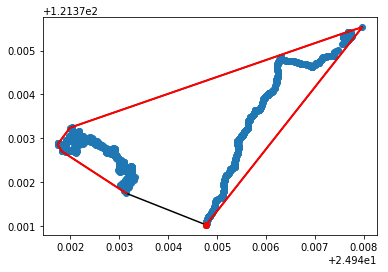

In [165]:
from scipy.spatial import ConvexHull
location = []
for x in range(len(latitude)):
    location.append([latitude[x], longitude[x]])

trainingset = np.array(location)
plt.plot(trainingset[:,0], trainingset[:,1], 'o')

hull = ConvexHull(trainingset)
for simplex in hull.simplices:
    plt.plot(trainingset[simplex,0], trainingset[simplex, 1], 'k-')
    
plt.plot(trainingset[hull.vertices,0], trainingset[hull.vertices,1], 'r-', lw=2)
plt.plot(trainingset[hull.vertices[0],0], trainingset[hull.vertices[0],1], 'ro')
plt.show()

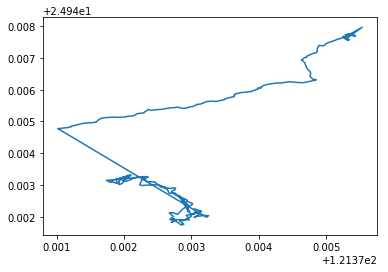

In [159]:
import matplotlib.pyplot as plt
plt.plot(longitude,latitude)